<a href="https://colab.research.google.com/github/mishitamaggo/python-projects/blob/main/Blinkit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Raw Data**

In [5]:
data = pd.read_csv("/content/blinkit_data.csv")
print (data)

     Item Fat Content Item Identifier              Item Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8518          low fat           NCT53     Health and Hygiene   
8519          low fat           FDN09            Snack Foods   
8520          low fat           DRE13            Soft Drinks   
8521              reg           FDT50                  Dairy   
8522              reg           FDM58            Snack Foods   

      Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                          2012            OUT049               Tier 1   
1                          2022            OUT018               Tier 3   
2        

**Top 20 & Size of the Data**

In [10]:
print (data .head(20))
print (data.shape)

   Item Fat Content Item Identifier              Item Type  \
0           Regular           FDX32  Fruits and Vegetables   
1           Low Fat           NCB42     Health and Hygiene   
2           Regular           FDR28           Frozen Foods   
3           Regular           FDL50                 Canned   
4           Low Fat           DRI25            Soft Drinks   
5           low fat           FDS52           Frozen Foods   
6           Low Fat           NCU05     Health and Hygiene   
7           Low Fat           NCD30              Household   
8           Low Fat           FDW20  Fruits and Vegetables   
9           Low Fat           FDX25                 Canned   
10               LF           FDX21            Snack Foods   
11          Low Fat           NCU41     Health and Hygiene   
12          Low Fat           FDL20  Fruits and Vegetables   
13          Low Fat           NCR54              Household   
14          Low Fat           FDH19                   Meat   
15      

**Name of the Coloums**

In [13]:
print (data.columns)

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')


**Data Type**

In [14]:
print (data.dtypes)

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object


In [17]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


**DATA CLEANING & VALIDATION** *italicised text*

In [27]:
data['Item Fat Content'] = (data['Item Fat Content'].replace({'LF':'Low Fat','reg': 'Regular','low fat':'Low Fat'}))
print (data['Item Fat Content'].unique())

['Regular' 'Low Fat']


**Sales**

In [34]:
#Total Sales
print (data['Sales'].sum())

#Average Sale
print (data['Sales'].mean())

#Items Sold
print (data['Sales'].count())

#Avg Rating
print (data['Rating'].mean())

1201681.4808
140.9927819781767
8523
3.965857092573038


CHART 1
Sales by Fat Content

```
# This is formatted as code
```



Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64
([<matplotlib.patches.Wedge object at 0x7ff4a4b08250>, <matplotlib.patches.Wedge object at 0x7ff4a3f0ff10>], [Text(-0.48712027526941815, 0.9862625600829865, 'Regular'), Text(0.48712012634790924, -0.9862626336360905, 'Low Fat')])


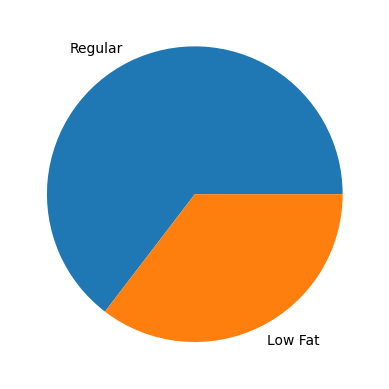

In [38]:
print(data.groupby('Item Fat Content')['Sales'].sum())
print (plt.pie(data.groupby('Item Fat Content')['Sales'].sum(), labels = data['Item Fat Content'].unique()))

CHART 2
Sales by Fat Item Type

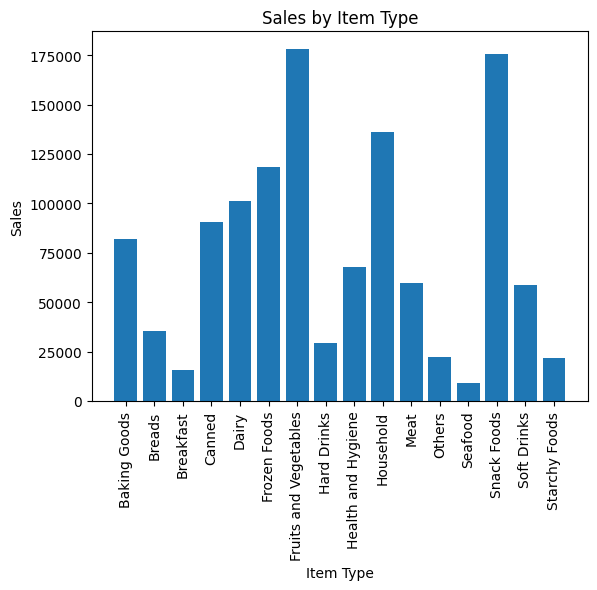

In [42]:
item_type_sales = data.groupby('Item Type')['Sales'].sum()
plt.bar(item_type_sales.index, item_type_sales.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.title('Sales by Item Type')
plt.show()

**FAT CONTENT BY OUTLET FOR TOTAL SALE**

In [43]:
grouped = data.groupby(['Item Fat Content', 'Outlet Identifier'])['Sales'].sum().reset_index()
pivot_table = grouped.pivot(index='Item Fat Content', columns='Outlet Identifier', values='Sales')
print(pivot_table)

Outlet Identifier      OUT010      OUT013      OUT017      OUT018      OUT019  \
Item Fat Content                                                                
Low Fat            51785.8296  86402.1448  82947.0458  84844.6070  48028.5354   
Regular            26345.7350  45406.8708  46156.9106  46633.1654  25779.0470   

Outlet Identifier      OUT027      OUT035      OUT045      OUT046      OUT049  
Item Fat Content                                                               
Low Fat            83774.4110  86482.9174  85034.8102  84603.3212  82416.0560  
Regular            46940.2636  46620.9896  45907.9680  47510.0486  48060.8038  
